# 员工离职预测
##### 参赛地址：http://www.dcjingsai.com/common/cmpt/%E5%91%98%E5%B7%A5%E7%A6%BB%E8%81%8C%E9%A2%84%E6%B5%8B%E8%AE%AD%E7%BB%83%E8%B5%9B_%E7%AB%9E%E8%B5%9B%E4%BF%A1%E6%81%AF.html

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [317]:
#取数
train = pd.read_csv('/Users/cy_ariel/Desktop/员工离职预测训练赛/pfm_train.csv')
test = pd.read_csv('/Users/cy_ariel/Desktop/员工离职预测训练赛/pfm_test.csv')

In [318]:
train.info()
print('-----------')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

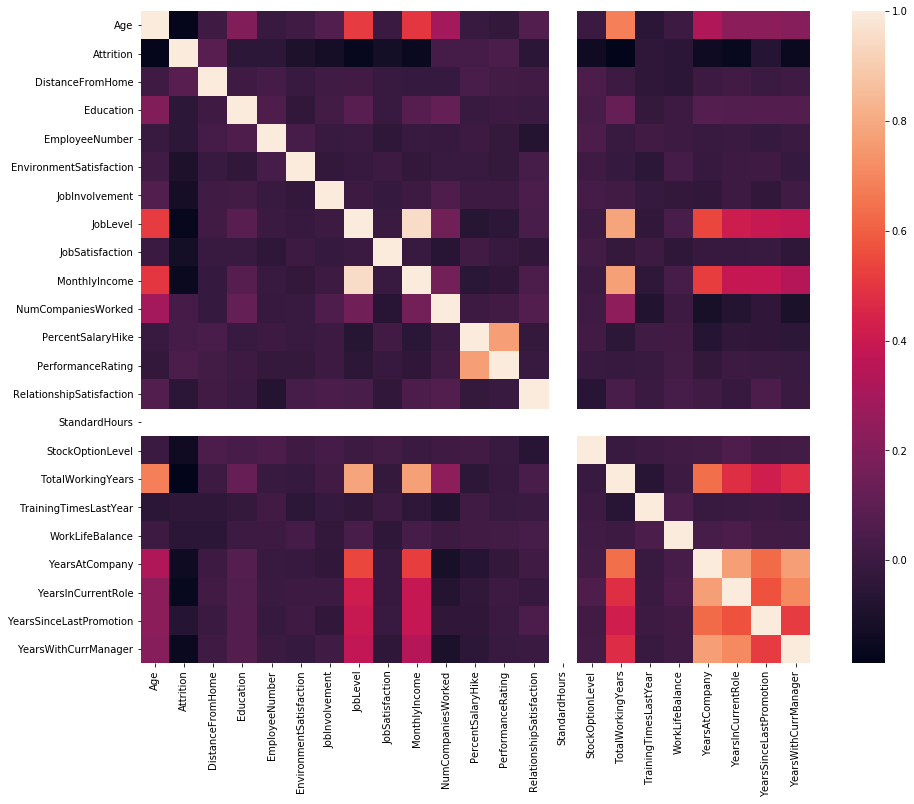

In [319]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat)

In [320]:
k=29
corrmat.nlargest(k,'Attrition')['Attrition']

Attrition                   1.000000
DistanceFromHome            0.088563
PerformanceRating           0.046762
PercentSalaryHike           0.026604
NumCompaniesWorked          0.025889
TrainingTimesLastYear      -0.043395
EmployeeNumber             -0.045168
Education                  -0.046494
WorkLifeBalance            -0.048794
RelationshipSatisfaction   -0.051749
YearsSinceLastPromotion    -0.071760
EnvironmentSatisfaction    -0.097003
JobInvolvement             -0.122722
JobSatisfaction            -0.125568
StockOptionLevel           -0.138498
YearsAtCompany             -0.143697
MonthlyIncome              -0.155521
YearsWithCurrManager       -0.158558
YearsInCurrentRole         -0.163059
JobLevel                   -0.168775
Age                        -0.175393
TotalWorkingYears          -0.187922
Name: Attrition, dtype: float64

In [321]:
train_df = train.drop(['EmployeeNumber','Over18','MonthlyIncome','YearsWithCurrManager','YearsAtCompany','TotalWorkingYears','PercentSalaryHike'],axis=1)
test_df = test.drop(['EmployeeNumber','Over18','MonthlyIncome','YearsWithCurrManager','YearsAtCompany','TotalWorkingYears','PercentSalaryHike'],axis=1)

In [322]:
train_df.info()
print('------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 24 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
NumCompaniesWorked          1100 non-null int64
OverTime                    1100 non-null object
PerformanceRating           1100 non-null int64
RelationshipSatisfaction    1100 non-null int64
StandardHours         

In [323]:
train_df[['OverTime','Attrition']].groupby('OverTime',as_index=False).mean().sort_values(by='Attrition')

,OverTime,Attrition
0,No,0.100756
1,Yes,0.320261


In [324]:
dum1_train = pd.get_dummies(train_df['OverTime'])
dum1_train.set_axis(['overtime_No','overtime_Yes'],axis=1)
train_df = pd.concat([train_df,dum1_train],axis=1)
train_df = train_df.drop(['OverTime','overtime_No'],axis=1)
dum1_test = pd.get_dummies(test_df['OverTime'])
dum1_test.set_axis(['overtime_No','overtime_Yes'],axis=1)
test_df = pd.concat([test_df,dum1_test],axis=1)
test_df = test_df.drop(['OverTime','overtime_No'],axis=1)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  
/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [325]:
train_df[['BusinessTravel','Attrition']].groupby('BusinessTravel',as_index=False).mean().sort_values(by='Attrition')

,BusinessTravel,Attrition
0,Non-Travel,0.083333
2,Travel_Rarely,0.156290
1,Travel_Frequently,0.224390


In [326]:
dum2_train = pd.get_dummies(train_df['BusinessTravel'])
train_df = pd.concat([train_df,dum2_train],axis=1)
train_df = train_df.drop(['BusinessTravel','Non-Travel'],axis=1)
dum2_test = pd.get_dummies(test_df['BusinessTravel'])
test_df = pd.concat([test_df,dum2_test],axis=1)
test_df = test_df.drop(['BusinessTravel','Non-Travel'],axis=1)

In [327]:
train_df[['MaritalStatus','Attrition']].groupby('MaritalStatus',as_index=False).mean().sort_values(by='Attrition')

,MaritalStatus,Attrition
0,Divorced,0.092437
1,Married,0.124000
2,Single,0.259669


In [328]:
dum3_train = pd.get_dummies(train_df['MaritalStatus'])
train_df = pd.concat([train_df,dum3_train],axis=1)
train_df = train_df.drop(['MaritalStatus','Divorced'],axis=1)
dum3_test = pd.get_dummies(test_df['MaritalStatus'])
test_df = pd.concat([test_df,dum3_test],axis=1)
test_df = test_df.drop(['MaritalStatus','Divorced'],axis=1)

In [329]:
train_df[['JobRole','Attrition']].groupby('JobRole',as_index=False).mean().sort_values(by='Attrition')

,JobRole,Attrition
5,Research Director,0.035714
0,Healthcare Representative,0.050000
3,Manager,0.062500
4,Manufacturing Director,0.079208
7,Sales Executive,0.170040
6,Research Scientist,0.185520
2,Laboratory Technician,0.209756
1,Human Resources,0.272727
8,Sales Representative,0.403509


In [330]:
dum4_train = pd.get_dummies(train_df['JobRole'])
dum4_train.set_axis(['jobrole_Research','jobrole_Healthcare','jobrole_Manager','jobrole_Manufacturing','jobrole_Executive','jobrole_Scientist','jobrole_Laboratory','jobrole_Human','jobrole_Representative'],axis=1)
train_df = pd.concat([train_df,dum4_train],axis=1)
train_df = train_df.drop(['JobRole','jobrole_Research'],axis=1)
dum4_test = pd.get_dummies(test_df['JobRole'])
dum4_test.set_axis(['jobrole_Research','jobrole_Healthcare','jobrole_Manager','jobrole_Manufacturing','jobrole_Executive','jobrole_Scientist','jobrole_Laboratory','jobrole_Human','jobrole_Representative'],axis=1)
test_df = pd.concat([test_df,dum4_test],axis=1)
test_df = test_df.drop(['JobRole','jobrole_Research'],axis=1)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  
/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [331]:
train_df[['Gender','Attrition']].groupby('Gender',as_index=False).mean().sort_values(by='Attrition')

,Gender,Attrition
0,Female,0.154362
1,Male,0.166922


In [332]:
dum5_train = pd.get_dummies(train_df['Gender'])
train_df = pd.concat([train_df,dum5_train],axis=1)
train_df = train_df.drop(['Gender','Female'],axis=1)
dum5_test = pd.get_dummies(test_df['Gender'])
test_df = pd.concat([test_df,dum5_test],axis=1)
test_df = test_df.drop(['Gender','Female'],axis=1)

In [333]:
train_df = train_df.drop(['EducationField'],axis=1)
test_df = test_df.drop(['EducationField'],axis=1)

In [334]:
train_df = train_df.drop(['Department'],axis=1)
test_df = test_df.drop(['Department'],axis=1)

In [335]:
X_train = train_df.loc[:,train_df.columns!='Attrition']
Y_train = train_df.loc[:,train_df.columns=='Attrition']

In [336]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobSatisfaction             1100 non-null int64
NumCompaniesWorked          1100 non-null int64
PerformanceRating           1100 non-null int64
RelationshipSatisfaction    1100 non-null int64
StandardHours               1100 non-null int64
StockOptionLevel            1100 non-null int64
TrainingTimesLastYear       1100 non-null int64
WorkLifeBalance             1100 non-null int64
YearsInCurrentRole          1100 non-null int64
YearsSinceLastPromotion     1100 non-null int64
overtime_Yes                1100 non-null uint8
Travel_Frequently           1

## LR建模

In [337]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [338]:
X_train_1 = X_train
Y_train_1 = Y_train

In [342]:
test_1 = test_df

In [340]:
lr.fit(X_train,Y_train)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [343]:
y_pre = lr.predict(test_1)

In [344]:
df = pd.DataFrame(y_pre)

In [345]:
df.set_axis(['result'],axis=1)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


In [346]:
df.to_csv('/Users/cy_ariel/Desktop/员工离职预测训练赛/result.csv')

### 随机森林建模

In [347]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

random_forest = RandomForestClassifier()

random_forest.fit(X_train_1, Y_train_1)

Y_pred = random_forest.predict(test_1)

random_forest.score(X_train_1, Y_train_1)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.9790909090909091

In [348]:
y_pre = pd.DataFrame(Y_pred)

In [349]:
y_pre.set_axis(['result'],axis=1)

/Users/cy_ariel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  """Entry point for launching an IPython kernel.


In [350]:
y_pre.to_csv('/Users/cy_ariel/Desktop/员工离职预测训练赛/result.csv')